# Get started with Earth Engine for Python

In [ ]:
#@title Copyright 2024 The Earth Engine Community Authors { display-mode: "form" }
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

This quickstart will give you an interactive introduction to visualizing and
analyzing geospatial data with the Earth Engine Python interface.

## Before you begin

[Register or create](https://code.earthengine.google.com/register) a Google Cloud Project; you'll be prompted to complete the following steps. If you already have a project registered for Earth Engine access, skip to the next section.

  * Select the project's purpose: commercial or noncommercial.
  * If the purpose is noncommercial, select a project type.
  * Create a new Google Cloud project or select an existing project.
  * If the purpose is commercial, verify or set up billing for your project.
  * Confirm your project information.  

**Note:** If you don't plan to keep the resources that you create in this procedure, create a project instead of selecting an existing project. After you finish these steps, you can [delete the project](https://cloud.google.com/resource-manager/docs/creating-managing-projects#shutting_down_projects), removing all resources owned by the project.

## Notebook setup

**1.** Import the Earth Engine and geemap libraries.

In [1]:
import ee
import geemap.core as geemap

**2.** Authenticate and initialize the Earth Engine service. Follow the
resulting prompts to complete authentication. Be sure to replace PROJECT_ID
with the name of the project you set up for this quickstart.

In [4]:
ee.Authenticate()
ee.Initialize(project='landfillmongolia')

## Add raster data to a map

**1.** Load climate data for a given period and display its metadata.

In [5]:
jan_2023_climate = (
    ee.ImageCollection('ECMWF/ERA5_LAND/MONTHLY_AGGR')
    .filterDate('2023-01', '2023-02')
    .first()
)
jan_2023_climate

**2.** Instantiate a map object and add the temperature band as a layer with
specific visualization properties. Display the map.

In [6]:
m = geemap.Map(center=[30, 0], zoom=2)

vis_params = {
    'bands': ['temperature_2m'],
    'min': 229,
    'max': 304,
    'palette': 'inferno',
}
m.add_layer(jan_2023_climate, vis_params, 'Temperature (K)')
m

Map(center=[30, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

## Add vector data to a map

**1.** Create a vector data object with points for three cities.

In [11]:
cities = ee.FeatureCollection([
    ee.Feature(ee.Geometry.Point(-16.7167, 28.05), {'city': 'Los Cristianos'}),
    ee.Feature(ee.Geometry.Point(-0.1275, 51.5072), {'city': 'London'}),
    ee.Feature(ee.Geometry.Point(106.9167, 47.9167), {'city': 'Ulaanbaatar'}),
])
cities

**2.** Add the city locations to the map and redisplay it.

In [12]:
m.add_layer(cities, name='Cities')
m

Map(bottom=646.0, center=[50.28933925329178, 29.531250000000004], controls=(ZoomControl(options=['position', '…

## Extract and chart data

**1.** Import the Altair charting library.

In [13]:
%pip install -q --upgrade altair
import altair as alt

**2.** Extract the climate data for the three cities as a pandas DataFrame.

In [14]:
city_climates = jan_2023_climate.reduceRegions(cities, ee.Reducer.first())

city_climates_dataframe = ee.data.computeFeatures(
    {'expression': city_climates, 'fileFormat': 'PANDAS_DATAFRAME'}
)
city_climates_dataframe

,geo,city,dewpoint_temperature_2m,dewpoint_temperature_2m_max,dewpoint_temperature_2m_min,evaporation_from_bare_soil_max,evaporation_from_bare_soil_min,evaporation_from_bare_soil_sum,evaporation_from_open_water_surfaces_excluding_oceans_max,evaporation_from_open_water_surfaces_excluding_oceans_min,...,volumetric_soil_water_layer_1_min,volumetric_soil_water_layer_2,volumetric_soil_water_layer_2_max,volumetric_soil_water_layer_2_min,volumetric_soil_water_layer_3,volumetric_soil_water_layer_3_max,volumetric_soil_water_layer_3_min,volumetric_soil_water_layer_4,volumetric_soil_water_layer_4_max,volumetric_soil_water_layer_4_min
0,"{'type': 'Point', 'coordinates': [-16.7167, 28...",Los Cristianos,284.904483,289.714874,280.219955,0.000000e+00,-0.000075,-0.008060,1.213746e-06,-1.224796e-04,...,0.120682,0.185285,0.199783,0.174698,0.159735,0.160065,0.159286,0.064886,0.064957,0.064819
1,"{'type': 'Point', 'coordinates': [-0.1275, 51....",London,276.142310,284.355530,266.892303,4.656613e-10,-0.000082,-0.003810,1.575239e-05,-2.732081e-05,...,0.374649,0.401553,0.429108,0.380920,0.401269,0.411789,0.392471,0.364579,0.375916,0.350464
2,"{'type': 'Point', 'coordinates': [106.9167, 47...",Ulaanbaatar,247.231636,264.427246,230.608780,0.000000e+00,-0.000002,-0.000009,4.656613e-10,-2.328306e-10,...,0.254425,0.221425,0.221436,0.221420,0.188739,0.188751,0.188721,0.194448,0.194458,0.194427


**3.** Plot the temperature for the cities as a bar chart.

In [15]:
alt.Chart(city_climates_dataframe).mark_bar(size=100).encode(
    alt.X('city:N', sort='y', axis=alt.Axis(labelAngle=0), title='City'),
    alt.Y('temperature_2m:Q', title='Temperature (K)'),
    tooltip=[
        alt.Tooltip('city:N', title='City'),
        alt.Tooltip('temperature_2m:Q', title='Temperature (K)'),
    ],
).properties(title='January 2023 temperature for selected cities', width=500)

alt.Chart(...)

## What's next

  * Learn about analyzing data with Earth Engine's [objects and methods](https://developers.google.com/earth-engine/guides/objects_methods_overview).
  * Learn about Earth Engine's [processing environments](https://developers.google.com/earth-engine/guides/processing_environments).
  * Learn about Earth Engine's [machine learning capabilities](https://developers.google.com/earth-engine/guides/machine-learning).
  * Learn how to [export your computation results to BigQuery](https://developers.google.com/earth-engine/guides/exporting_to_bigquery).

Temperature change in Los Cristianos

In [18]:
import ee
import geemap
import pandas as pd
ee.Initialize(project='landfillmongolia')

# 1. Define Los Cristianos point
los_cristianos = ee.Geometry.Point([-16.7167, 28.05])

In [29]:
# 2. Load TerraClimate and filter by date
terraclimate = ee.ImageCollection("IDAHO_EPSCOR/TERRACLIMATE") \
  .filterBounds(los_cristianos) \
  .filterDate("1990-01-01", "2024-12-31") \
  .select(['tmmn', 'tmmx', 'tavg'])  # already in °C

In [30]:
# 3. Function to extract values per month
def extract_monthly_climate(image):
    date = ee.Date(image.get('system:time_start'))
    stats = image.reduceRegion(
        reducer=ee.Reducer.mean(),
        geometry=los_cristianos,
        scale=4000,
        maxPixels=1e8
    )
    return ee.Feature(None, {
        'date': date.format('YYYY-MM'),
        'tmmn': stats.get('tmmn'),
        'tmmx': stats.get('tmmx'),
        'tavg': stats.get('tavg')
    })

In [31]:
# 4. Map the function over the collection
monthly_stats = terraclimate.map(extract_monthly_climate)
monthly_fc = ee.FeatureCollection(monthly_stats)

In [22]:
# 5. Export to pandas DataFrame for plotting
df = geemap.ee_to_pandas(monthly_fc)
df['date'] = pd.to_datetime(df['date'])

AttributeError: module 'geemap' has no attribute 'ee_to_pandas'

In [23]:
# 5. Export to pandas DataFrame for plotting
# Ensure the main geemap library is imported to access ee_to_pandas
import geemap

df = geemap.ee_to_pandas(monthly_fc)
df['date'] = pd.to_datetime(df['date'])

AttributeError: module 'geemap' has no attribute 'ee_to_pandas'

In [24]:
# Ensure the main geemap library is imported to access ee_to_pandas
import geemap

df = geemap.ee_to_pandas(monthly_fc)
df['date'] = pd.to_datetime(df['date'])

AttributeError: module 'geemap' has no attribute 'ee_to_pandas'

In [32]:
# 5. Convert FeatureCollection to a Python list of dictionaries
features = monthly_fc.getInfo()['features']
data = []

for f in features:
    props = f['properties']
    data.append({
        'date': props['date'],
        'tmmn': props['tmmn'],
        'tmmx': props['tmmx'],
        'tavg': props['tavg']
    })

# 6. Load into pandas
import pandas as pd
df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])


EEException: Error in map(ID=199005):
Image.select: Band pattern 'tavg' did not match any bands. Available bands: [aet, def, pdsi, pet, pr, ro, soil, srad, swe, tmmn, tmmx, vap, vpd, vs]

In [33]:
# 2. Load TerraClimate and filter by date
terraclimate = ee.ImageCollection("IDAHO_EPSCOR/TERRACLIMATE") \
  .filterBounds(los_cristianos) \
  .filterDate("1990-01-01", "2024-12-31") \
  .select(['tmmn', 'tmmx'])  # Remove 'tavg' as it's not an available band

# 3. Function to extract values per month and calculate average temperature
def extract_monthly_climate(image):
    date = ee.Date(image.get('system:time_start'))
    stats = image.reduceRegion(
        reducer=ee.Reducer.mean(),
        geometry=los_cristianos,
        scale=4000,
        maxPixels=1e8
    )
    # Calculate average temperature if needed
    tavg = ee.Number(stats.get('tmmn')).add(stats.get('tmmx')).divide(2)
    return ee.Feature(None, {
        'date': date.format('YYYY-MM'),
        'tmmn': stats.get('tmmn'),
        'tmmx': stats.get('tmmx'),
        'tavg': tavg  # Include the calculated average temperature
    })

# The subsequent steps to map the function and convert to pandas can remain the same.
# 4. Map the function over the collection
monthly_stats = terraclimate.map(extract_monthly_climate)
monthly_fc = ee.FeatureCollection(monthly_stats)

# 5. Convert FeatureCollection to a Python list of dictionaries
features = monthly_fc.getInfo()['features']
data = []

for f in features:
    props = f['properties']
    data.append({
        'date': props['date'],
        'tmmn': props['tmmn'],
        'tmmx': props['tmmx'],
        'tavg': props['tavg']
    })

# 6. Load into pandas
import pandas as pd
df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])

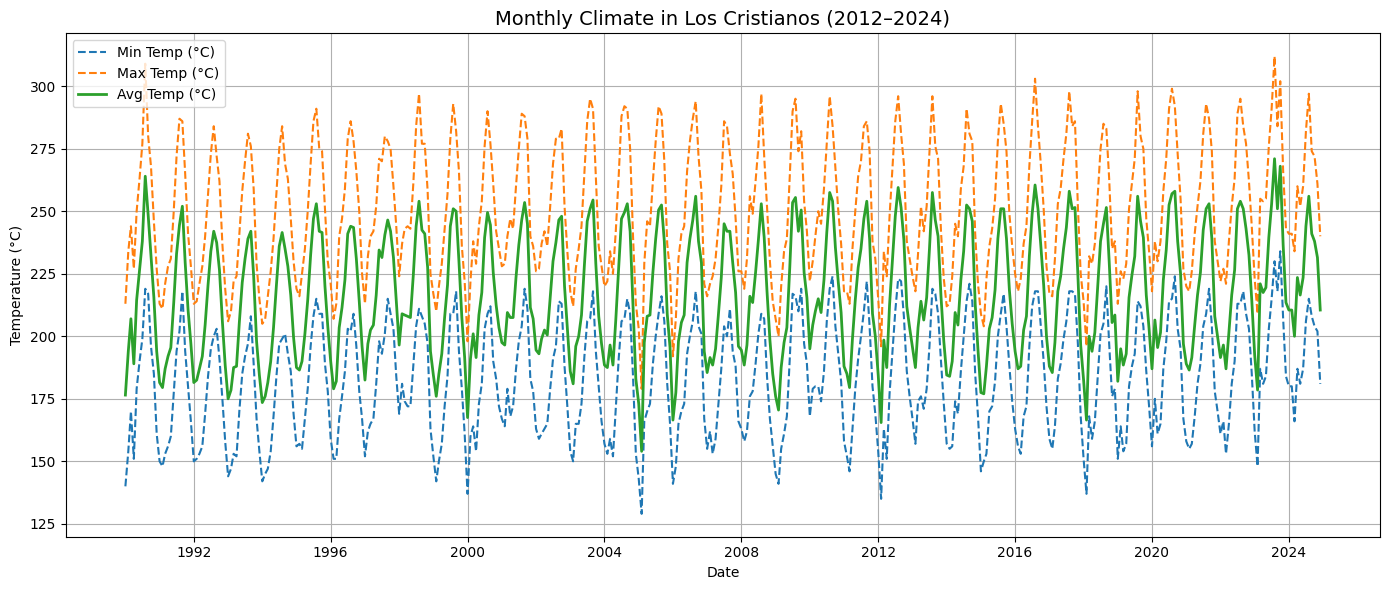

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df['date'], df['tmmn'], label='Min Temp (°C)', linestyle='--')
plt.plot(df['date'], df['tmmx'], label='Max Temp (°C)', linestyle='--')
plt.plot(df['date'], df['tavg'], label='Avg Temp (°C)', linewidth=2)

plt.title("Monthly Climate in Los Cristianos (2012–2024)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Show average water temperature at Las Vistas beach in Tenerife

In [35]:
import ee
import pandas as pd
import matplotlib.pyplot as plt
ee.Initialize(project='landfillmongolia')

# Las Vistas Beach: approx. coordinates
las_vistas = ee.Geometry.Point([-16.716, 28.047])

# Load NOAA OISST dataset
sst = ee.ImageCollection("NOAA/CDR/OISST/V2_1") \
    .filterBounds(las_vistas) \
    .filterDate("2014-01-01", "2024-12-31") \
    .select("sst")

In [36]:
# Function to extract SST at the point
def extract_sst(image):
    date = ee.Date(image.get('system:time_start')).format('YYYY-MM-dd')
    value = image.reduceRegion(
        reducer=ee.Reducer.mean(),
        geometry=las_vistas,
        scale=25000,
        maxPixels=1e9
    ).get('sst')
    return ee.Feature(None, {'date': date, 'sst': value})

In [37]:
# Apply to collection
sst_fc = ee.FeatureCollection(sst.map(extract_sst))

# Get features as list of dictionaries
features = sst_fc.getInfo()['features']
data = [{'date': f['properties']['date'], 'sst': f['properties']['sst']} for f in features]


In [38]:
# Convert to DataFrame
df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])
df['sst'] = pd.to_numeric(df['sst'], errors='coerce')  # Clean missing

# Group by month and compute average
df['month'] = df['date'].dt.to_period('M')
monthly_avg = df.groupby('month')['sst'].mean().round(2).reset_index()
monthly_avg['month'] = monthly_avg['month'].dt.to_timestamp()

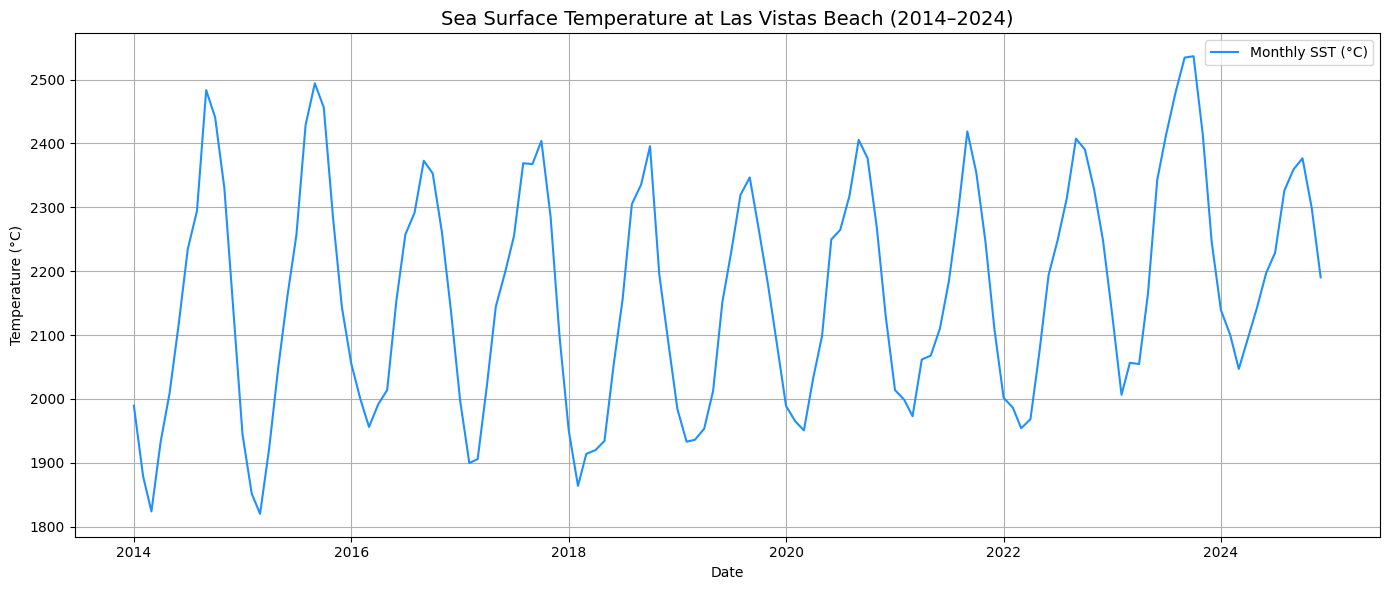

In [39]:
# Plot
plt.figure(figsize=(14,6))
plt.plot(monthly_avg['month'], monthly_avg['sst'], label='Monthly SST (°C)', color='dodgerblue')
plt.title("Sea Surface Temperature at Las Vistas Beach (2014–2024)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [40]:
# Load SST data from NOAA OISST for 2024
sst_2024 = ee.ImageCollection("NOAA/CDR/OISST/V2_1") \
    .filterBounds(las_vistas) \
    .filterDate("2024-01-01", "2024-12-31") \
    .select("sst")

# Extract SST for each daily image at the point
def extract_sst(image):
    date = ee.Date(image.get('system:time_start')).format('YYYY-MM-dd')
    value = image.reduceRegion(
        reducer=ee.Reducer.mean(),
        geometry=las_vistas,
        scale=25000,
        maxPixels=1e9
    ).get('sst')
    return ee.Feature(None, {'date': date, 'sst': value})

sst_fc_2024 = ee.FeatureCollection(sst_2024.map(extract_sst))

# Convert to DataFrame
features = sst_fc_2024.getInfo()['features']
data = [{'date': f['properties']['date'], 'sst': f['properties']['sst']} for f in features]

df_2024 = pd.DataFrame(data)
df_2024['date'] = pd.to_datetime(df_2024['date'])
df_2024['sst'] = pd.to_numeric(df_2024['sst'], errors='coerce')

# Group by month and calculate average SST
df_2024['month'] = df_2024['date'].dt.strftime('%B')
monthly_avg_2024 = df_2024.groupby('month')['sst'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]).round(2).reset_index()

# Display the table
print(monthly_avg_2024)

        month      sst
0     January  2138.90
1    February  2100.38
2       March  2046.81
3       April  2095.33
4         May  2142.68
5        June  2197.13
6        July  2229.03
7      August  2326.19
8   September  2359.53
9     October  2376.81
10   November  2298.97
11   December  2190.23
